In [94]:
# preparation
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap
%matplotlib inline
iris = pd.read_csv('iris.csv')
iris.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [95]:
# drop the first column which is not necessary
iris = iris.drop(labels ='Id', axis = 1)
iris.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [96]:
# one-hot convert categorical to numerical values for Species column
iris.Species[iris['Species'] == 'Iris-setosa'] = 0
iris.Species[iris['Species'] == 'Iris-versicolor'] = 1
iris.Species[iris['Species'] == 'Iris-virginica'] = 2

/Users/yananliu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yananliu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yananliu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

In [97]:
features = iris[['SepalLengthCm', 'SepalWidthCm']]
target = iris['Species']

X = features
y = target
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.819047619048
0.733333333333


In [102]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('green','red', 'pink', 'black','blue')
    cmap = ListedColormap(colors[:len(pd.unique(y))])
    x1_min = X.iloc[:, 0].min() - 1
    x1_max = X.iloc[:, 0].max() + 1
    x2_min = X.iloc[:, 1].min() - 1
    x2_max = X.iloc[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    for idx, value in enumerate(pd.unique(y)):
        plot = plt.scatter(x=X.iloc[value, 0], y=X.iloc[value, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=value)
    return plot

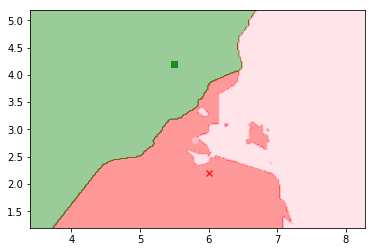

In [103]:
plot_decision_regions(X_test, y_test, knn)